In [1]:
from Simplex import noise, generate_noise
from simplex import Simplex_CLASS
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import torchvision.transforms as transform
from Simplex.noise import OpenSimplex
from simplex import Simplex_CLASS

In [2]:
def plot_tensor(tensor):
    array = tensor.numpy()
    array = array.transpose(1, 2, 0)
    plt.imshow(array)
    plt.axis('off')  # Optional: turn off the axis
    plt.show()
#     return array
# def plot_hist(tensor, tittle, vs):
#     # Generate random noise
#     noise = noise.flatten().numpy()
#     # Plot the histogram
#     plt.hist(noise, bins=50)  # Adjust the number of bins as needed
#     plt.xlabel('simplex noise')
#     plt.ylabel(vs)
#     plt.title(tittle)
#     plt.show()

In [3]:
octave=2
persistence=0.8
frequency = 16
in_channels = 1
num_timesteps = 1000

In [4]:
# # Open the PNG image using PIL
# path = r"C:\Users\Admin\Dropbox\PC\Documents\Anomaly Detection\AnoDDPM\DATASETS\brainMRI\train\good\No21.png"
# input_size = 32
# image = Image.open(path)
# image = np.array(image)
# image = Image.fromarray(image)
# image = transform.Resize((input_size, input_size))(image)
# image = transform.ToTensor()(image)
# x = image.unsqueeze(dim = 0)
x = torch.rand(1, in_channels, 64, 64)
t = torch.randint(0, num_timesteps, (x.shape[0],), device=x.device)

In [5]:
x.shape

torch.Size([1, 1, 64, 64])

In [6]:
t

tensor([535])

In [7]:
# plot_tensor(x[0])

In [8]:
simIns3 = Simplex_CLASS()
noise3d = generate_noise.generate_simplex_noise(simIns3, x, t, in_channels = in_channels)

In [9]:
noise3d[0].shape

torch.Size([1, 64, 64])

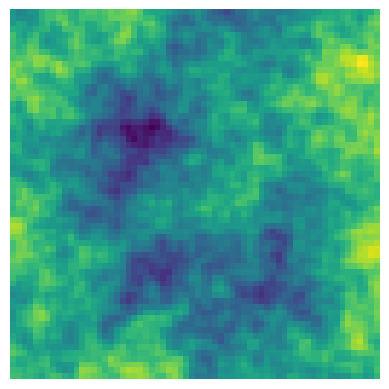

In [10]:
plot_tensor(noise3d[0])

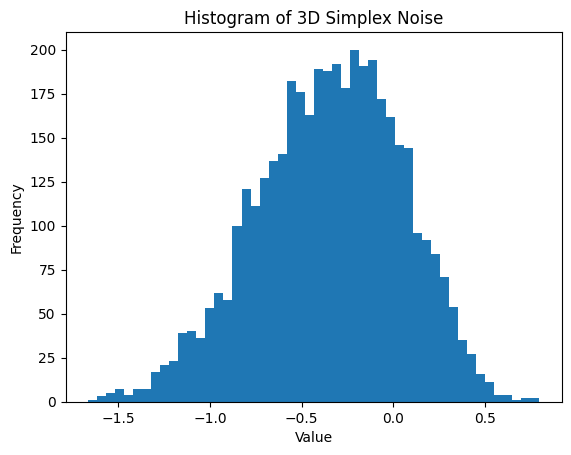

In [11]:
# Generate random noise
noise = noise3d.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 3D Simplex Noise')
plt.show()

In [12]:
t

tensor([535])

In [13]:
simIns = OpenSimplex(seed=100)
y = x.unsqueeze(-1)
noise4d = generate_noise.generate_simplex_4noise(simIns, y, t, in_channels=in_channels)

In [14]:
noise4d.shape

torch.Size([1, 1, 64, 64, 1])

In [15]:
n4 = noise4d[0].squeeze(-1)

In [16]:
n4.shape

torch.Size([1, 64, 64])

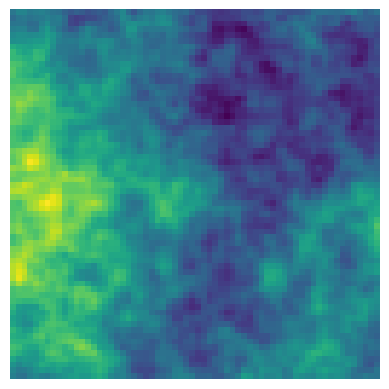

In [17]:
plot_tensor(n4)

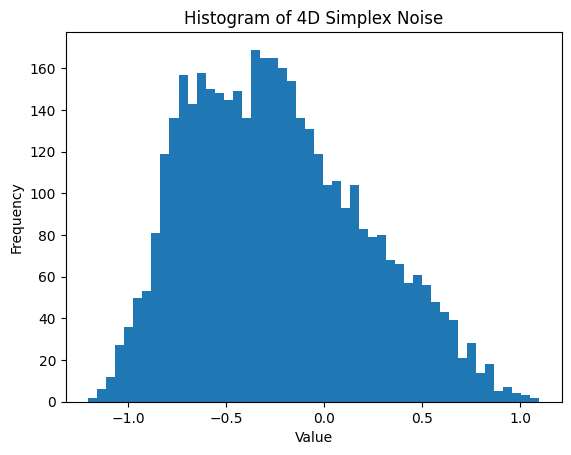

In [18]:
# Generate random noise
noise = n4.flatten().numpy()
# Plot the histogram
plt.hist(noise, bins=50)  # Adjust the number of bins as needed
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of 4D Simplex Noise')
plt.show()

In [32]:
y = torch.rand(1, 1, 64, 64, 1)

In [35]:
def oct_iterate(simIns, y, t, in_channels):
    simIns = OpenSimplex(seed=100)
    octvs = [i for i in range(0, 22, 2)]
    array = []
    for i in octvs:
        noicee = generate_noise.generate_simplex_4noise(Simplex_instance=simIns, x=y, t=t, in_channels= in_channels, octave = i)
        array.append(noicee.numpy().flatten())
        plt.hist(noicee.numpy().flatten(), bins=50)  # Adjust the number of bins as needed
        plt.xlabel('Value')
        plt.ylabel('Value')
        plt.title(f'Histogram of 4D Simplex Noise at {i}')
        plt.show()
#         print(noicee.shape)
    return array

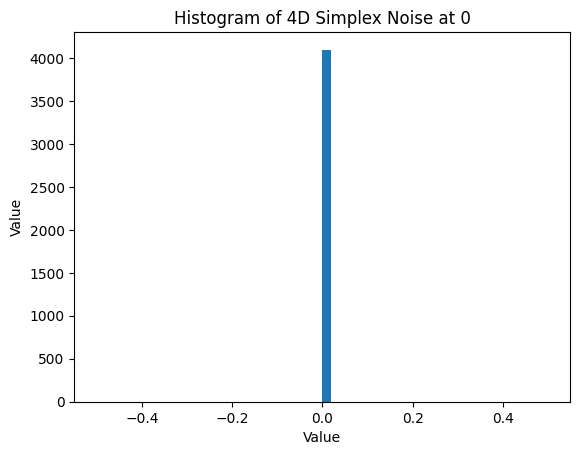

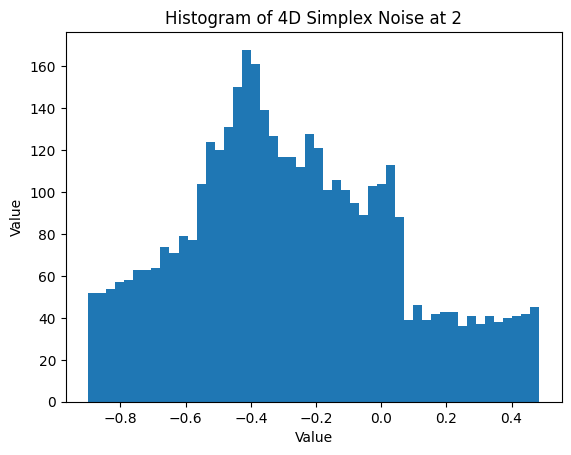

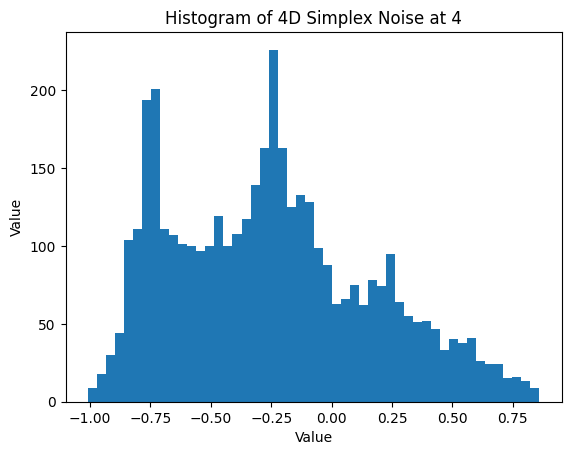

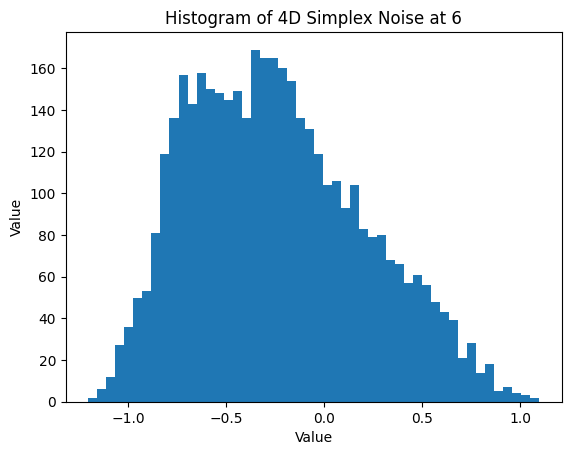

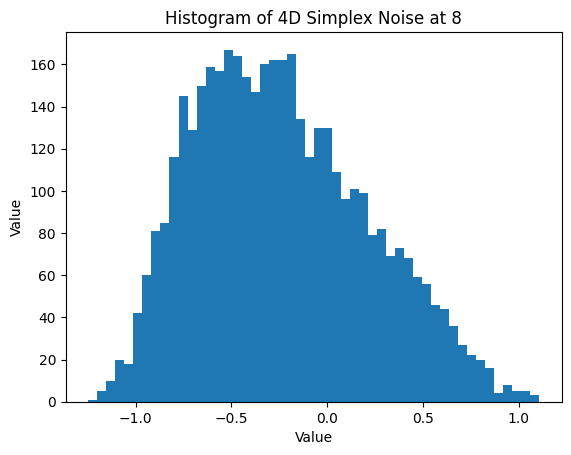

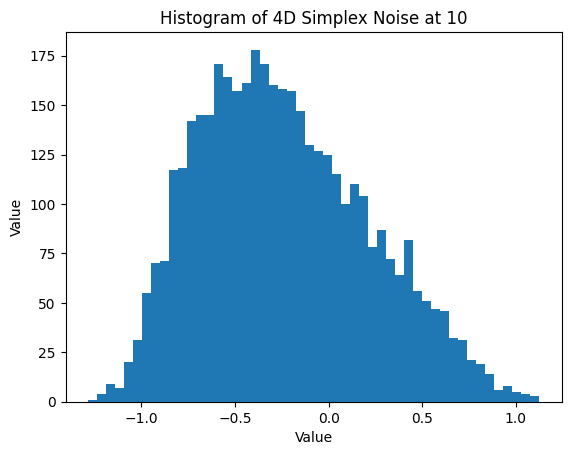

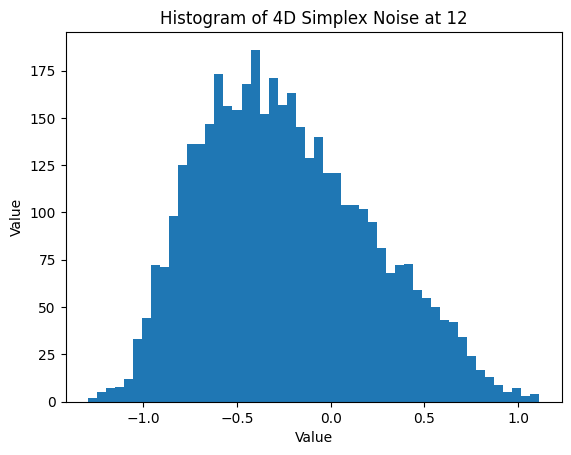

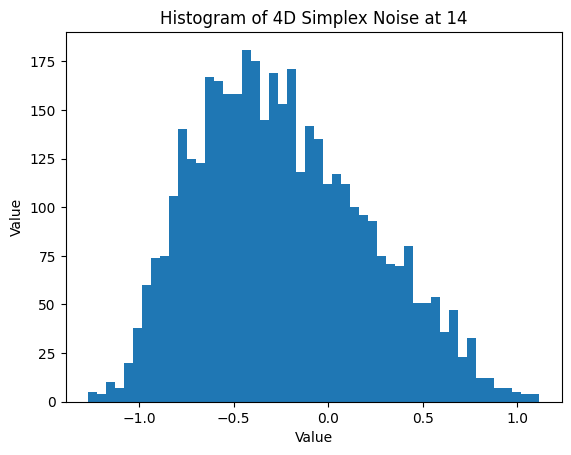

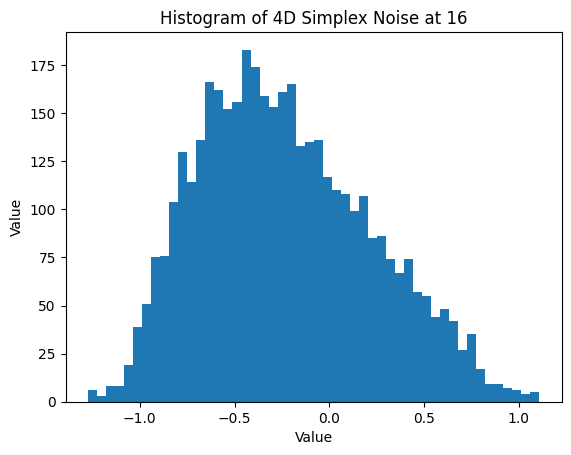

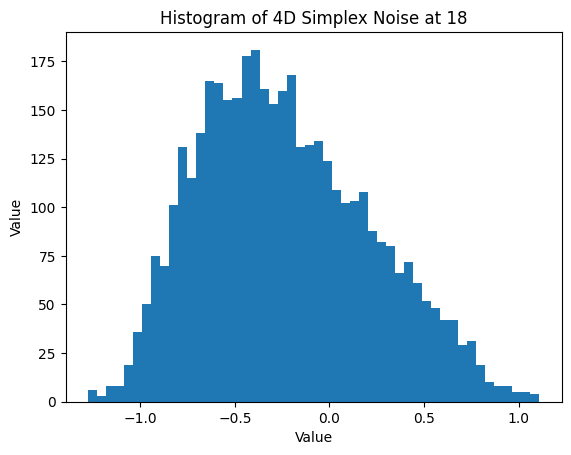

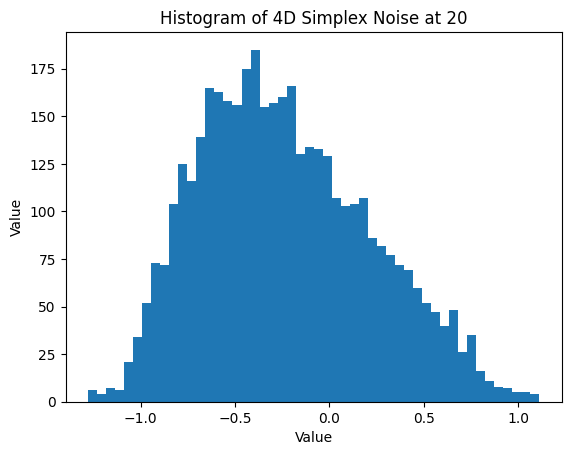

In [36]:
# oct_list = oct_iterate(simIns, y, t, in_channels)

In [61]:
y = torch.rand(1, 1, 64, 64)
def oct3d_iterate(simIns, y, t, in_channels):
    simIns3 = Simplex_CLASS()
    noise3d = generate_noise.generate_simplex_noise(simIns3, x, t, in_channels = in_channels)
    octvs = [i for i in range(0, 22, 2)]
    array = []
    for i in octvs:
        noicee = generate_noise.generate_simplex_noise(Simplex_instance=simIns3, x=y, t=t, in_channels= in_channels, octave = i, frequency=2)
        data = noicee.numpy().flatten()
        print(data.shape)
        array.append(data)
        plt.hist(data, bins=50)  # Adjust the number of bins as needed
        plt.xlabel('range')
        plt.ylabel('Value')
        plt.title(f'Histogram of 3D Simplex Noise at {i}')
        plt.show()
#         print(noicee.shape)
    return array

(4096,)


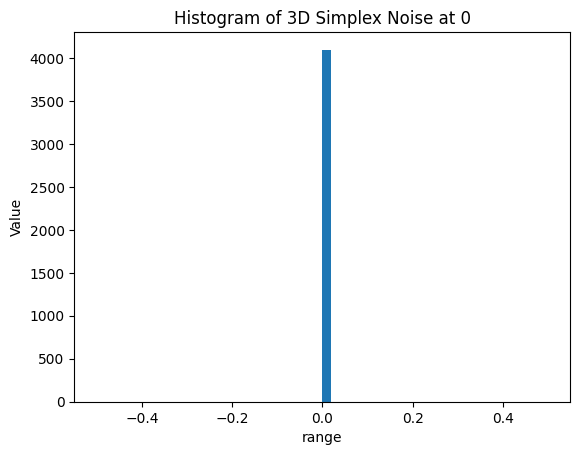

(4096,)


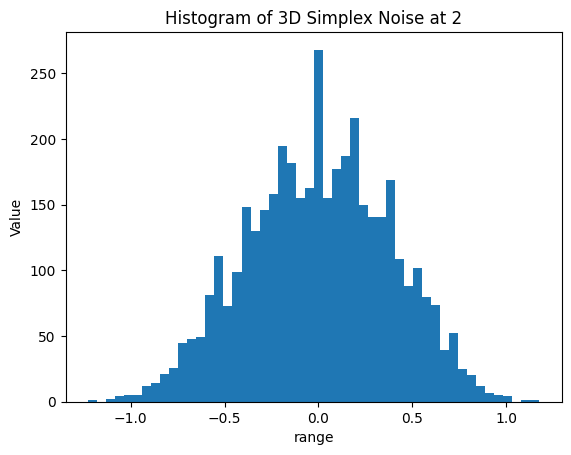

(4096,)


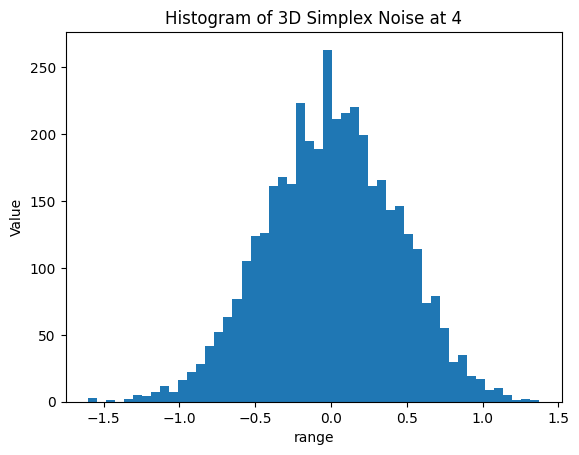

(4096,)


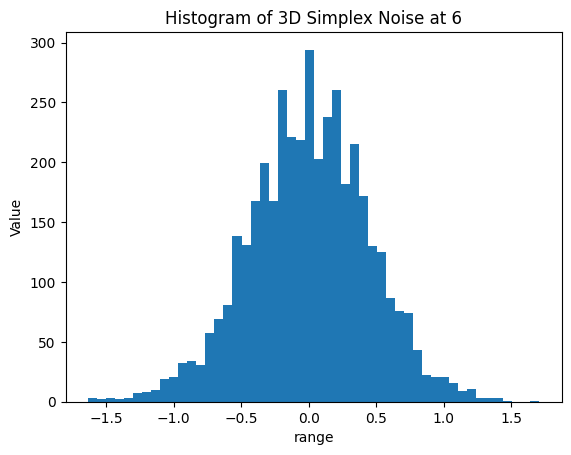

(4096,)


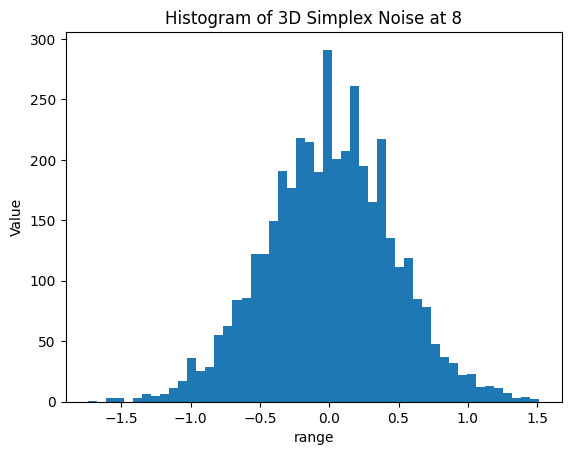

(4096,)


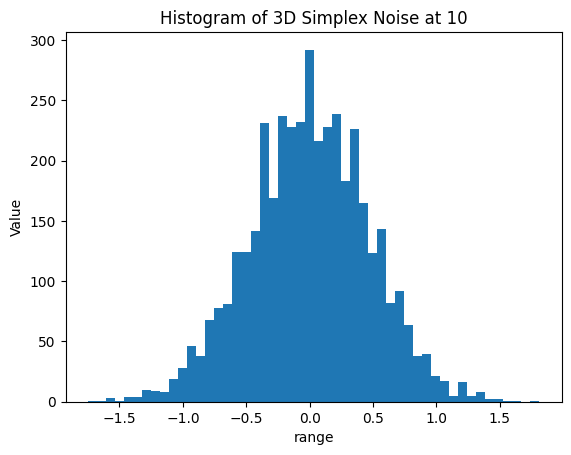

(4096,)


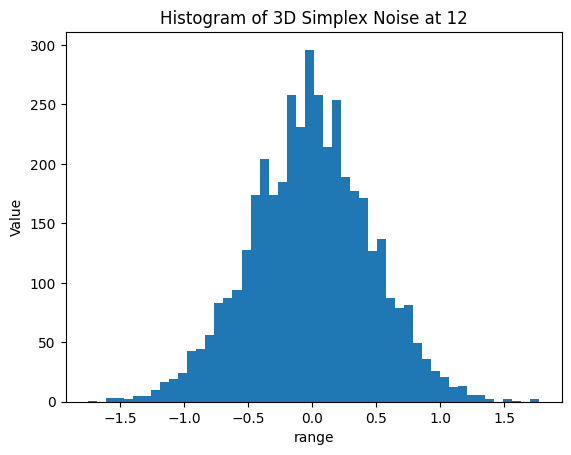

(4096,)


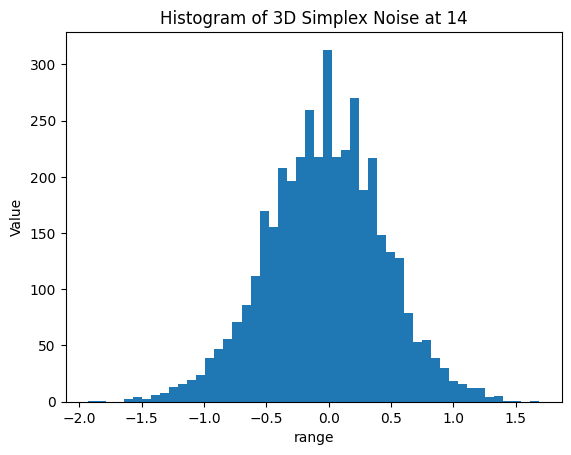

(4096,)


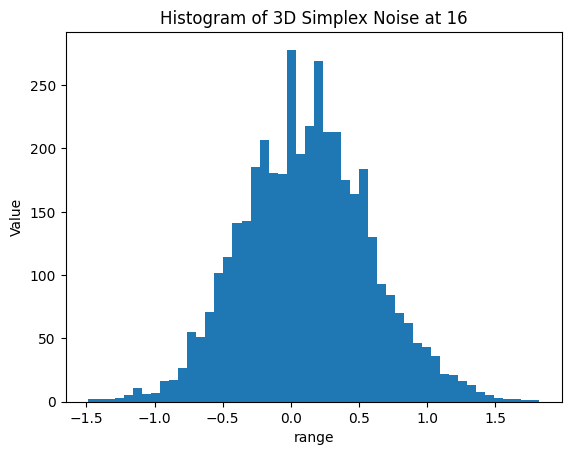

(4096,)


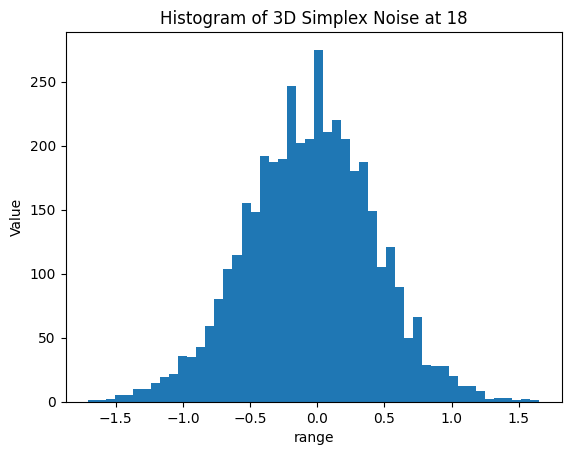

(4096,)


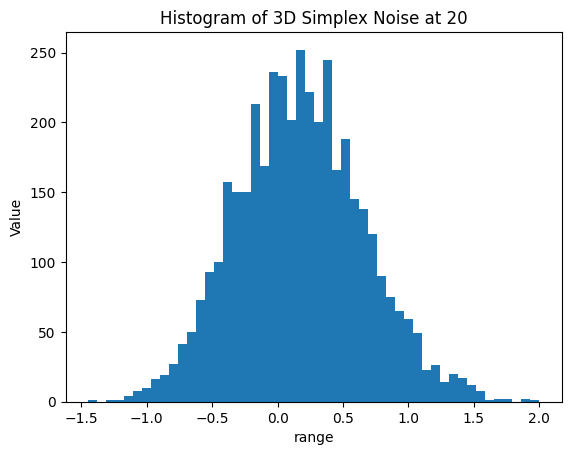

In [62]:
oct3d_list = oct3d_iterate(simIns, y, t, in_channels)

In [63]:
import pandas as pd

In [65]:
fourdarr = pd.DataFrame(np.array(oct_list))

In [69]:
fourdarr.to_csv("simplex_octave_values.csv")